# Loading the data

In [2]:
import pandas as pd
import numpy as np

In [5]:
names = ['mpg', 'cylinders','displacement', 'horsepower', 
         'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                header=None,delim_whitespace=True,names=names,na_values='?')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [6]:
df.shape

(398, 9)

In [7]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=398, step=1)

In [9]:
df.values

array([[18.0, 8, 307.0, ..., 70, 1, 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 1, 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 1, 'plymouth satellite'],
       ...,
       [32.0, 4, 135.0, ..., 82, 1, 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 1, 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 1, 'chevy s-10']], dtype=object)

In [10]:
df.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

In [12]:
df2 = df['cylinders']
df2.head(6)

0    8
1    8
2    8
3    8
4    8
5    8
Name: cylinders, dtype: int64

In [14]:
df2 = df[['cylinders','horsepower']]
df2.head(10)

,cylinders,horsepower
0,8,130.0
1,8,165.0
2,8,150.0
3,8,150.0
4,8,140.0
5,8,198.0
6,8,220.0
7,8,215.0
8,8,225.0
9,8,190.0


# Plotting the data

In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
xstr = 'displacement'
x = np.array(df[xstr])
y = np.array(df['mpg'])

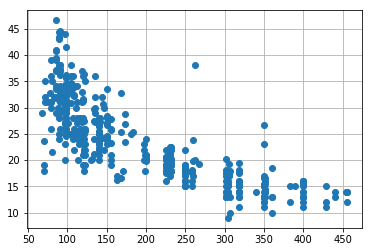

In [21]:
plt.plot(x,y,'o')
plt.grid()

# Manipulating Numpy arrays

In [32]:
mx = np.mean(x)
my = np.mean(y)
print('Mean {0:s} = {1:5.1f}, mean mpg = {2:5.1f}'.format(xstr,mx,my))

Mean displacement = 193.4, mean mpg =  23.5


In [33]:
np.mean(y>25)

0.3969849246231156

In [36]:
I = (y>25)
np.mean(x*I)/np.mean(I)

110.08227848101266

# Missing Data and NaN values

In [37]:
xstr = 'horsepower'
x = np.array(df[xstr])
y = np.array(df['mpg'])
np.mean(x)

nan

In [39]:
# nan means we have NaN data in this column
df1 = df[['mpg','horsepower']]
df2 = df1.dropna()
print(df1.shape)
df2.shape

(398, 2)


(392, 2)

In [40]:
x = np.array(df2['horsepower'])
y = np.array(df2['mpg'])
np.mean(x)

104.46938775510205

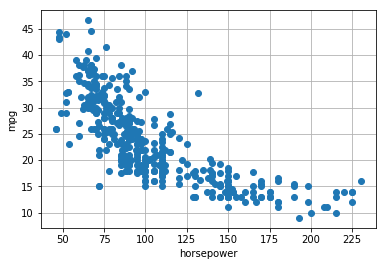

In [41]:
plt.plot(x,y,'o')
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid()

# Computing and plotting a linear Fit

In [43]:
xm = np.mean(x)
ym = np.mean(y)
syy = np.mean((y-ym)**2)
syx = np.mean((y-ym)*(x-xm))
sxx = np.mean((x-xm)**2)
beta1 = syx/sxx
beta0 = ym - beta1*xm

print("xbar     ={0:7.2f},       ybar={1:7.2f}".format(xm,ym))
print("sqrt(sxx)={0:7.2f},  sqrt(syy)={1:7.2f}".format(np.sqrt(sxx),np.sqrt(syy)))
print("beta0={0:7.2f}, beta1={1:7.2f}".format(beta0,beta1))


xbar     = 104.47,       ybar=  23.45
sqrt(sxx)=  38.44,  sqrt(syy)=   7.80
beta0=  39.94, beta1=  -0.16


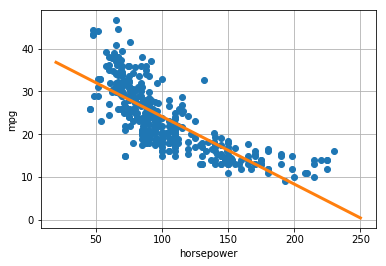

In [44]:
# Points on the regression line
xplt = np.array([20,250])          
yplt = beta1*xplt + beta0

plt.plot(x,y,'o')                    # Plot the data points
plt.plot(xplt,yplt,'-',linewidth=3)  # Plot the regression line
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)

In [45]:
yhat = beta0+beta1*x
RSS = np.mean((y-yhat)**2)
print("RSS = {0:7.2f}".format(RSS))

RSS =   23.94


In [46]:
rxy=syx/np.sqrt(sxx)/np.sqrt(syy)
RSSmin=(1-rxy*rxy)*syy
print("RSSmin = {0:7.2f}".format(RSSmin))

RSSmin =   23.94


# Nonlinear Transformation

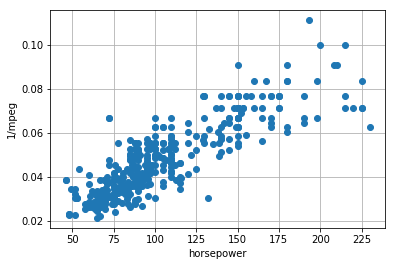

In [47]:
z = 1/y
plt.plot(x,z,'o')
plt.xlabel(xstr)
plt.ylabel('1/mpeg')
plt.grid()

In [48]:
xm = np.mean(x)
zm = np.mean(z)
sxz = np.mean((z-zm)*(x-xm))
sxx = np.mean((x-xm)**2)
beta1_inv = sxz/sxx
beta0_inv = zm - beta1_inv*xm

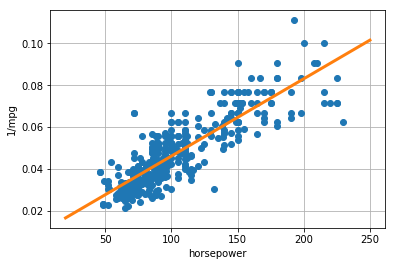

In [49]:
z = 1/y
xplt_inv = np.linspace(20,250,100)
zplt_inv = beta1_inv*xplt_inv + beta0_inv
plt.plot(x,z,'o')
plt.plot(xplt_inv,zplt_inv,'-',linewidth=3)
plt.xlabel(xstr)
plt.ylabel('1/mpg')
plt.grid()

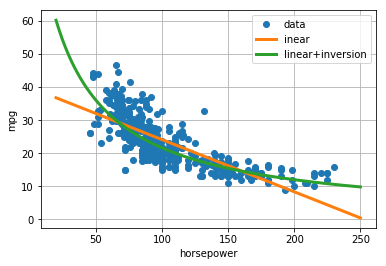

In [53]:
yplt_inv = 1/zplt_inv
plt.plot(x,y,'o')
plt.plot(xplt,yplt,'-',linewidth=3)
plt.plot(xplt_inv,yplt_inv,'-',linewidth=3)
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid()
plt.legend(['data','inear','linear+inversion'])

In [54]:
zhat_inv = beta0_inv + beta1_inv*x
yhat_inv = 1/zhat_inv
RSS_inv = np.mean((yhat_inv-y)**2)
print("RSS = {0:7.2f} (linear)".format(RSS))
print("RSS = {0:7.2f} (linear+inversion)".format(RSS_inv))

RSS =   23.94 (linear)
RSS =   20.66 (linear+inversion)
